<a href="https://colab.research.google.com/github/hpbowala/ComputerVisionAssignment/blob/main/249290X_ComputerVisionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [589]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [590]:
base_path = '/content/drive/MyDrive/ComputerVissionAssignment/a1images/'

### Question 1

In [591]:
#read image from the folder
q1b_image_path = base_path + 'emma.jpg'
q1b_image = cv.imread( q1b_image_path, cv.IMREAD_GRAYSCALE)
assert q1b_image is not None
#display image
#cv2_imshow(q1b_image)


In [592]:
c = np.array([(50, 50), (51, 100), (150,100),(151,255), (255,255)])

t1 = np.linspace(0, c[0,1], c[0,0]-0+1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1, c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1, c[4,1], c[4,0]-c[3,0]).astype('uint8')

In [593]:
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
image_transformed = cv.LUT(q1b_image, transform)


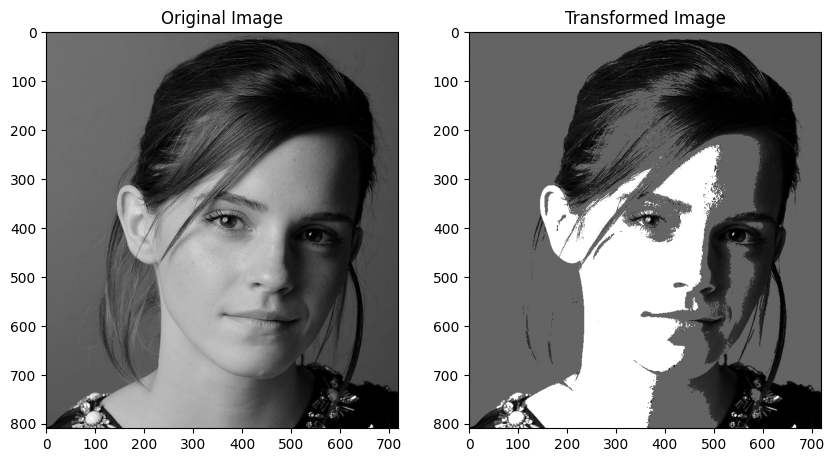

In [594]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q1b_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

### Question 2

In [595]:
q2_img_path = base_path + "brain_proton_density_slice.png";
q2_img = cv.imread(q2_img_path, cv.IMREAD_GRAYSCALE)
assert q2_img is not None

256


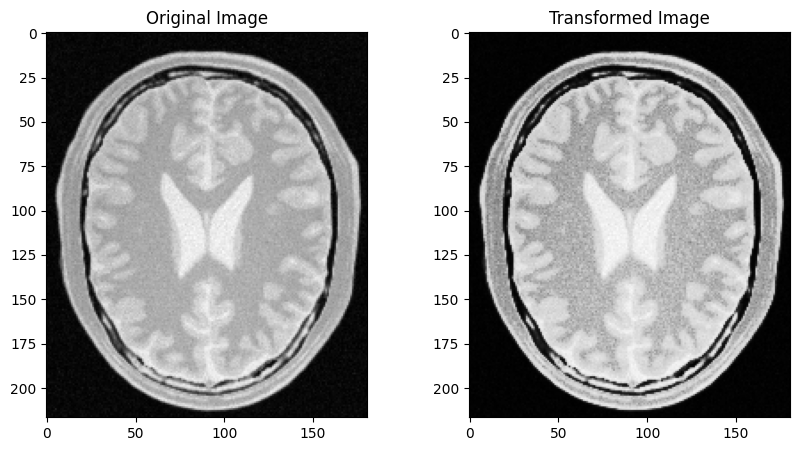

In [596]:
cntrlpt2 = np.array([(0, 0), (100, 40), (180, 200), (255, 255)])
q2_t1 = np.linspace(cntrlpt2[0, 1], cntrlpt2[1, 1], cntrlpt2[1, 0] - cntrlpt2[0, 0] + 1, endpoint=True).astype('uint8')
q2_t2 = np.linspace(cntrlpt2[1, 1], cntrlpt2[2, 1], cntrlpt2[2, 0] - cntrlpt2[1, 0] + 1, endpoint=True).astype('uint8')
q2_t3 = np.linspace(cntrlpt2[2, 1], cntrlpt2[3, 1], cntrlpt2[3, 0] - cntrlpt2[2, 0] + 1, endpoint=True).astype('uint8')

q2_transform = np.concatenate((q2_t1[:-1], q2_t2[:-1], q2_t3), axis=0).astype('uint8')

print(len(q2_transform))

q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


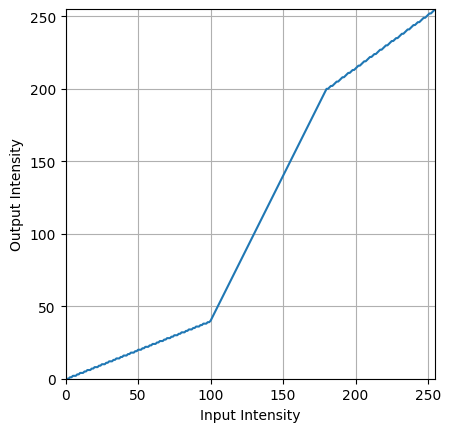

In [597]:
#plot graph
fig, ax = plt.subplots()
ax.plot(q2_transform)
ax.set_xlabel(r'Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

## Question 3 - Gamma Correction

In [598]:
q3_img_path = base_path + "highlights_and_shadows.jpg";
q3_img = cv.imread(q3_img_path, cv.IMREAD_COLOR)

assert q3_img is not None

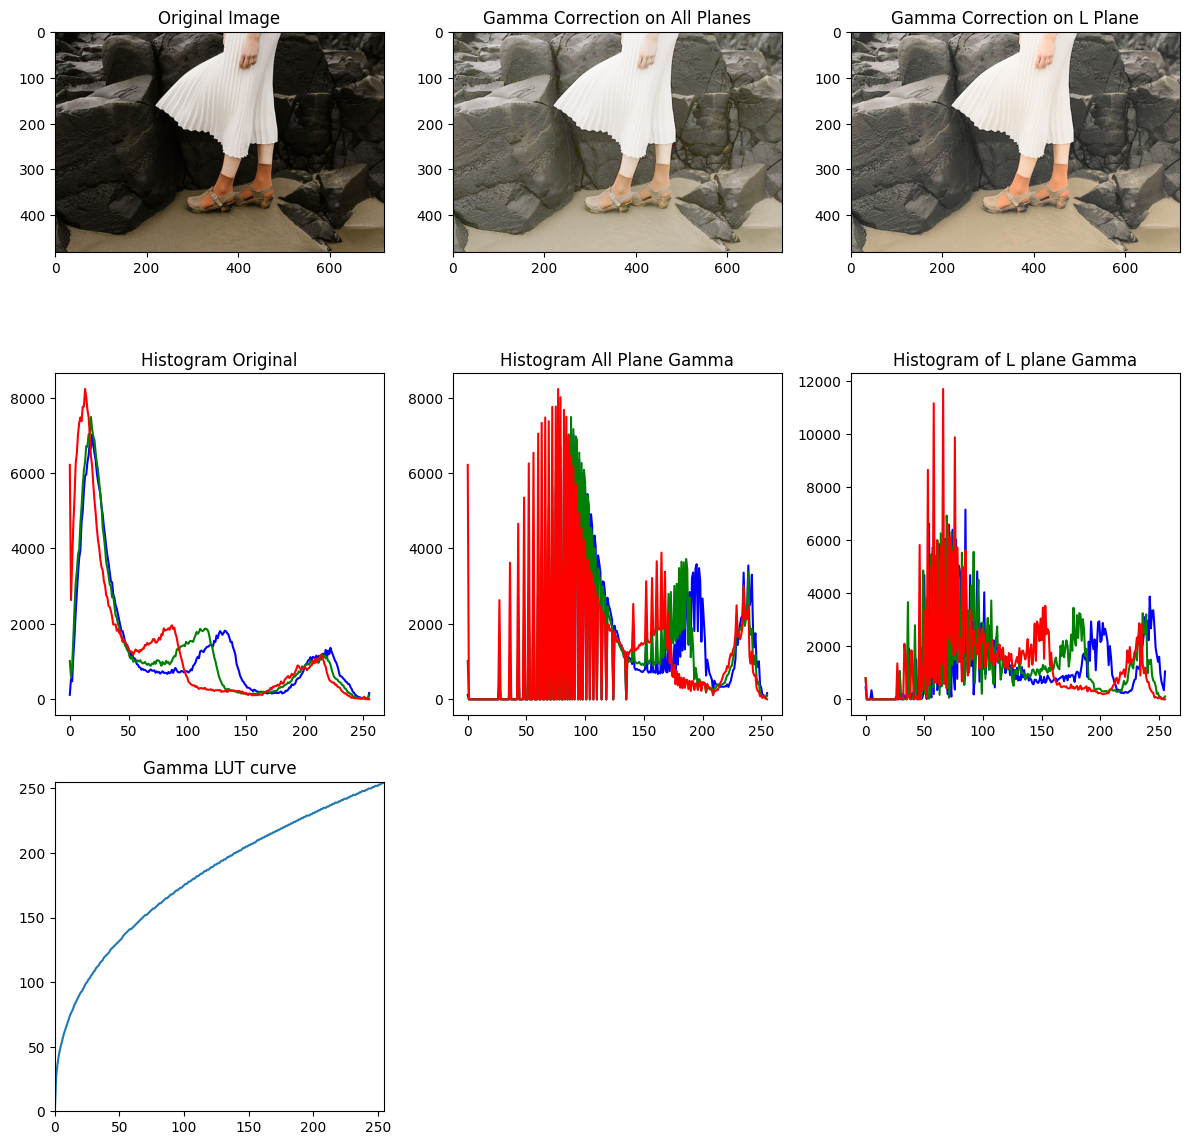

In [599]:
gamma = 2.5
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

#convert bgr imread to rgb
q3_img_rgb = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2RGB)
l_gamma = cv.cvtColor(q3_img, cv.COLOR_BGR2LAB)

#transform gamma in all 3 planes in LAB color space
img_gamma = cv.LUT(img_gamma, table)

#gamma correction in L plane only
L, a, b = cv.split(l_gamma)
l_gamma = cv.LUT(L, table)
l_gamma = cv.merge((l_gamma, a, b))
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_LAB2BGR)
l_gamma = cv.cvtColor(l_gamma, cv.COLOR_BGR2RGB)

f, ax3 = plt.subplots(3,3, figsize=(12,12))
ax3[0,0].imshow(q3_img_rgb)
ax3[0,0].set_title('Original Image')
ax3[0,1].imshow(img_gamma)
ax3[0,1].set_title('Gamma Correction on All Planes')
ax3[0,2].imshow(l_gamma)
ax3[0,2].set_title('Gamma Correction on L Plane')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([q3_img_rgb], [i], None, [256], [0,256])
    ax3[1,0].plot(hist_orig, color = c)
    ax3[1,0].set_title('Histogram Original')
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    ax3[1,1].plot(hist_gamma, color = c)
    ax3[1,1].set_title('Histogram All Plane Gamma')
    hist_l_gamma = cv.calcHist([l_gamma], [i], None, [256], [0,256])
    ax3[1,2].plot(hist_l_gamma, color = c)
    ax3[1,2].set_title('Histogram of L plane Gamma')

ax3[2,0].plot(table)
ax3[2,0].set_xlim(0,255)
ax3[2,0].set_ylim(0,255)
ax3[2,0].set_aspect('equal')
ax3[2,0].set_title('Gamma LUT curve')

ax3[2,1].axis('off')
ax3[2,2].axis('off')

plt.tight_layout()
plt.show()

## Question 4


In [600]:
q4_img_path = base_path + "spider.png";
q4_img = cv.imread(q4_img_path, cv.IMREAD_COLOR)
assert q4_img is not None

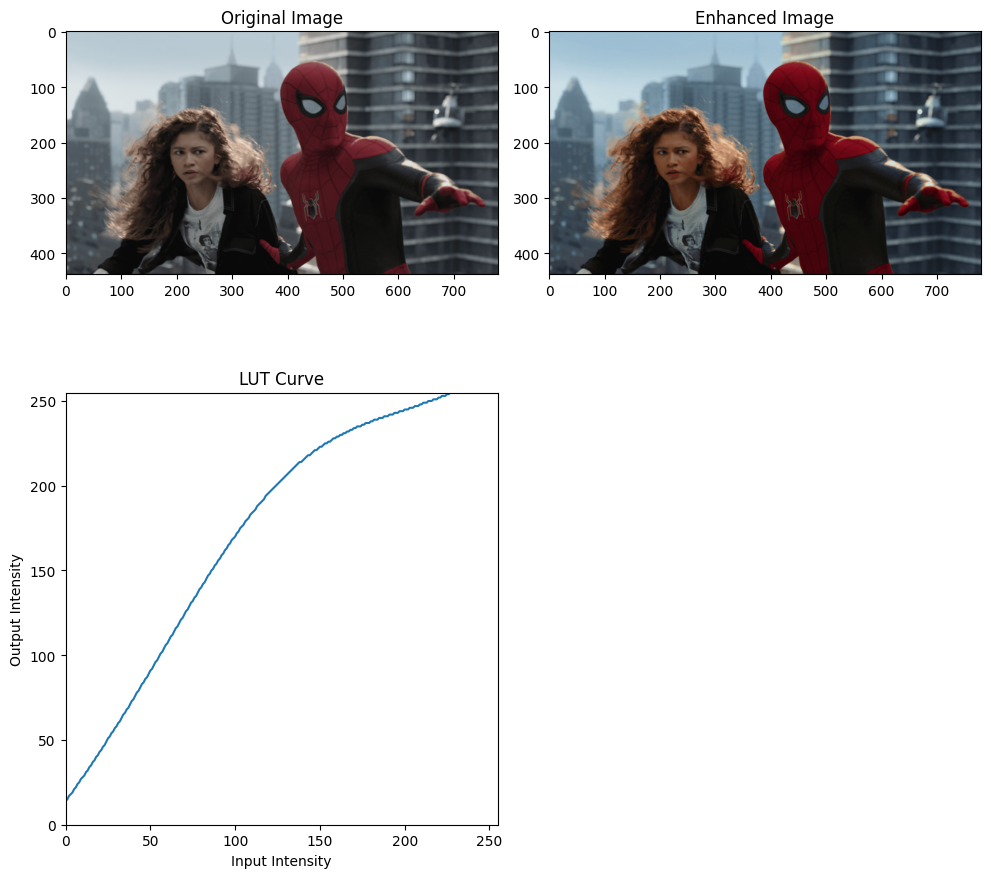

In [601]:
sigma = 70.0
a = 0.60
q4_img_rgb = cv.cvtColor(q4_img, cv.COLOR_BGR2RGB)
q4_hsv = cv.cvtColor(q4_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(q4_hsv)

#build f(x)

q4_x = np.arange(256).astype('float32')
eqp1 = a * 128.0 * np.exp(-(( q4_x - 128.0) ** 2.0)/ (2.0 * sigma ** 2.0))
fx = np.minimum(q4_x + eqp1, 255).astype('uint8')

# transform saturation plane with equation
s_transform = cv.LUT(s, fx)
q4_hsv_enhance = cv.merge((h, s_transform, v))
q4_img_enhance = cv.cvtColor(q4_hsv_enhance, cv.COLOR_HSV2BGR)
q4_img_enhance_rgb = cv.cvtColor(q4_img_enhance, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(q4_img_rgb)
ax[0,0].set_title('Original Image')
ax[0,1].imshow(q4_img_enhance_rgb)
ax[0,1].set_title('Enhanced Image')
ax[1,0].plot(fx)
ax[1,0].set_xlim(0,255)
ax[1,0].set_ylim(0,255)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('LUT Curve')
ax[1,0].set_xlabel('Input Intensity')
ax[1,0].set_ylabel('Output Intensity')
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## Question 5

In [602]:
q5_img_path = base_path + "jeniffer.jpg";
q5_img = cv.imread(q5_img_path, cv.IMREAD_COLOR)
assert q5_img is not None

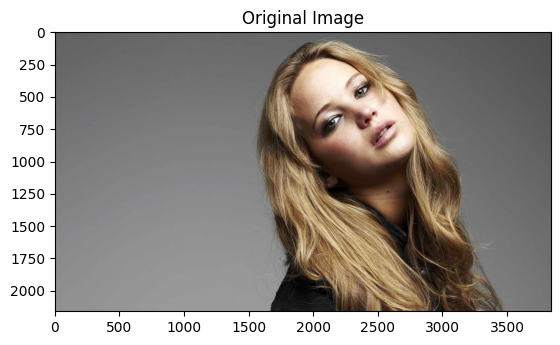

In [603]:
plt.imshow(cv.cvtColor(q5_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

/tmp/ipython-input-4132692701.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(q5_img.flatten(),256,[0,256], color = 'r')


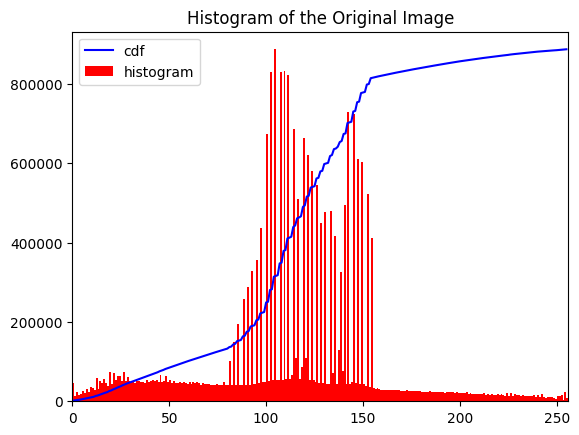

In [604]:
q5_hist_og_img, bins = np.histogram(q5_img.ravel(), bins=256, range=[0,256])
cdf = q5_hist_og_img.cumsum()
cdf_normalized = cdf * q5_hist_og_img.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(q5_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

In [605]:
q5_img_hsv = cv.cvtColor(q5_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(q5_img_hsv)

Text(0.5, 1.0, 'V Plane')

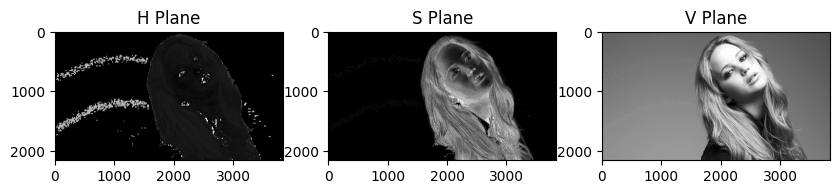

In [606]:
#display split planes
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(h,cmap='gray')
ax[0].set_title('H Plane')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('S Plane')
ax[2].imshow(v,cmap='gray')
ax[2].set_title('V Plane')

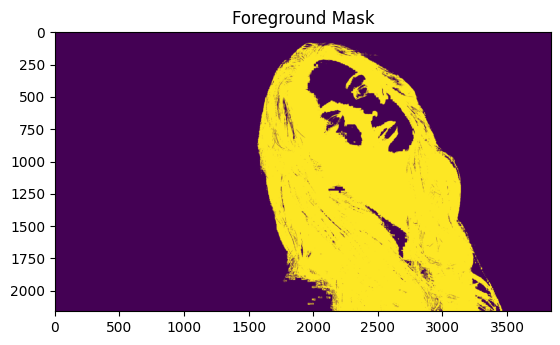

In [607]:
_, mask = cv.threshold(s, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(mask)
plt.title("Foreground Mask")
plt.show()


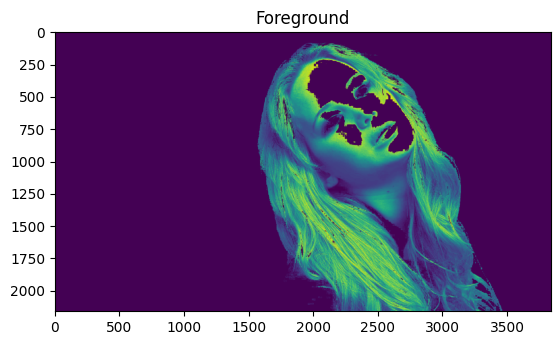

In [608]:
#extract foreground
q5_foreground = cv.bitwise_and(v, v, mask=mask)
plt.imshow(q5_foreground)
plt.title("Foreground")
plt.show()

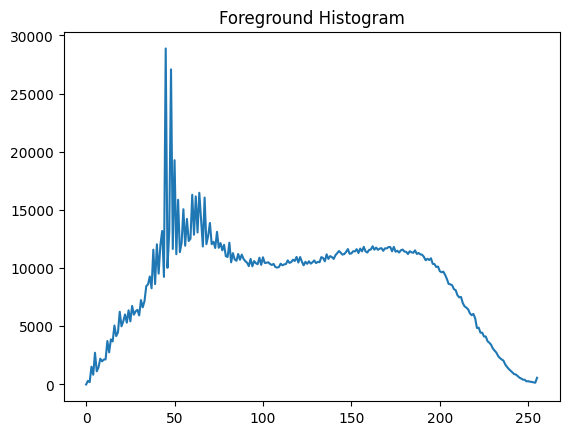

In [609]:
hist_fg = cv.calcHist([q5_foreground], [0], mask, [256], [0,256])
plt.plot(hist_fg)
plt.title("Foreground Histogram")
plt.show()

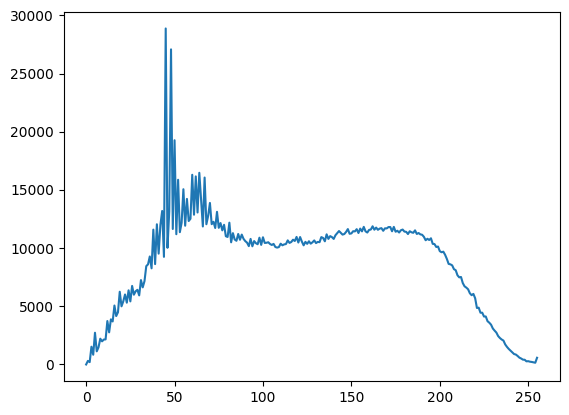

In [610]:
#alternative way to plot histogram
fhis, bins = np.histogram(q5_foreground[mask>0], bins=256, range=[0,256])
cdfhis = fhis[0].cumsum()
plt.plot(fhis)

In [611]:
#calcualate cumsum
cdf_hist_fg = hist_fg.cumsum()
cdf_norm = cdf_hist_fg * hist_fg.max()/ cdf_hist_fg.max()
cdf_n_viz = cdf_hist_fg / cdf_hist_fg[-1]


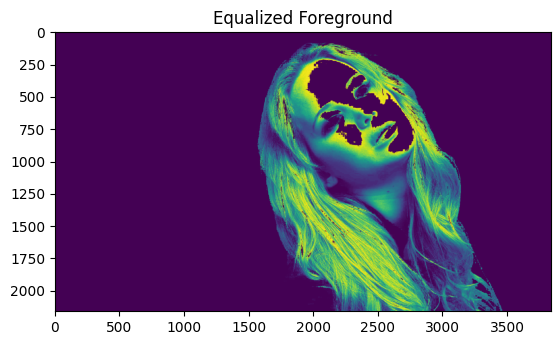

In [612]:
#Lookup table
L = 255
M = np.count_nonzero(mask)
N = 1
t = np.array([(L-1)/(M*N)*cdf_hist_fg[k] for k in range(256)], dtype=np.uint8)
#equalized image foreground
q5_foreground_eq = t[q5_foreground]
plt.imshow(q5_foreground_eq)
plt.title("Equalized Foreground")
plt.show()


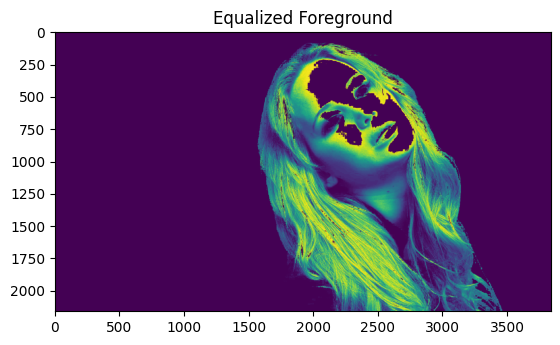

In [613]:
eq_alt = cv.equalizeHist(q5_foreground)
plt.imshow(eq_alt)
plt.title("Equalized Foreground")
plt.show()

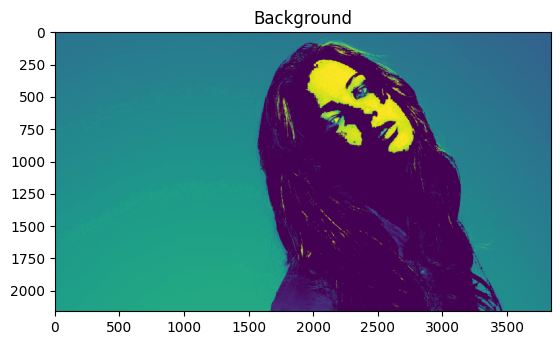

In [614]:
q5_background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
plt.imshow(q5_background)
plt.title("Background")
plt.show()

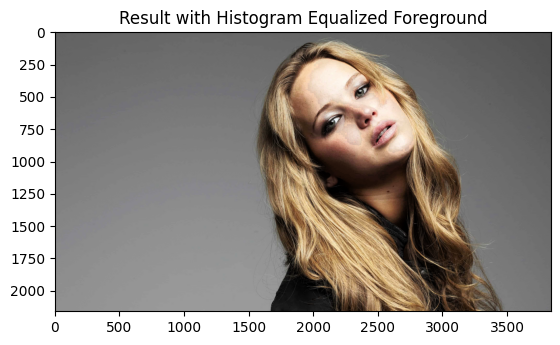

In [615]:
#add extracted background with foreground
q5_img_eq = cv.add(q5_background, q5_foreground_eq)
q5_merged = cv.merge([h, s, q5_img_eq])
q5_img_eq_bgr = cv.cvtColor(q5_merged, cv.COLOR_HSV2BGR)
plt.imshow(cv.cvtColor(q5_img_eq_bgr, cv.COLOR_BGR2RGB))
plt.title("Result with Histogram Equalized Foreground")
plt.show()

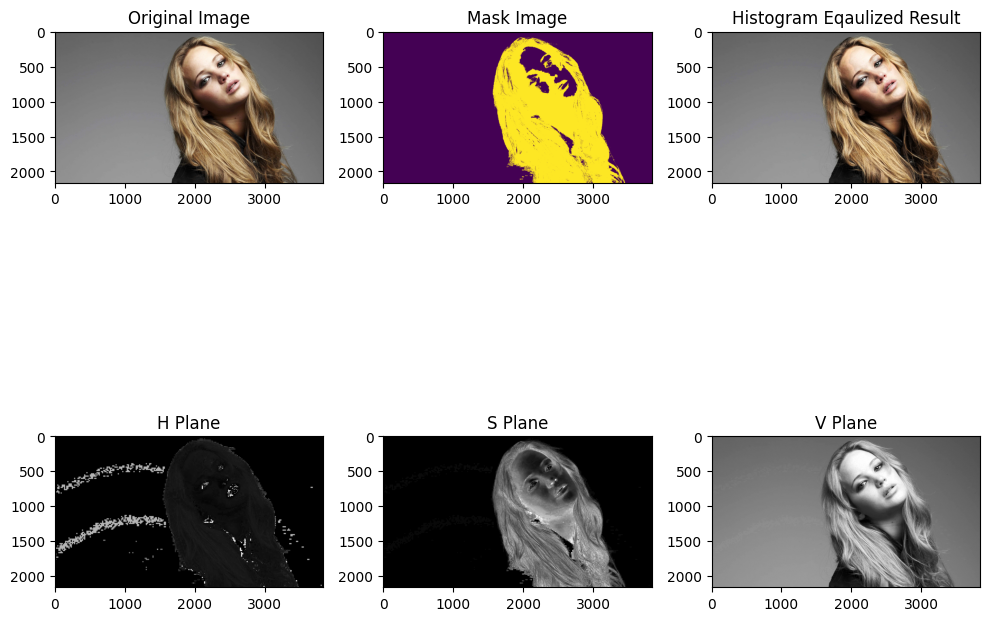

In [616]:
q5_fig, ax5 = plt.subplots(2,3, figsize=(10,10))
ax5[0,0].imshow(cv.cvtColor(q5_img, cv.COLOR_BGR2RGB))
ax5[0,0].set_title('Original Image')
ax5[0,1].imshow(mask)
ax5[0,1].set_title('Mask Image')
ax5[0,2].imshow(cv.cvtColor(q5_img_eq_bgr, cv.COLOR_BGR2RGB))
ax5[0,2].set_title('Histogram Eqaulized Result')
ax5[1,0].imshow(h, cmap="gray")
ax5[1,0].set_title('H Plane')
ax5[1,1].imshow(s, cmap="gray")
ax5[1,1].set_title('S Plane')
ax5[1,2].imshow(v, cmap="gray")
ax5[1,2].set_title('V Plane')
plt.tight_layout()
plt.show()




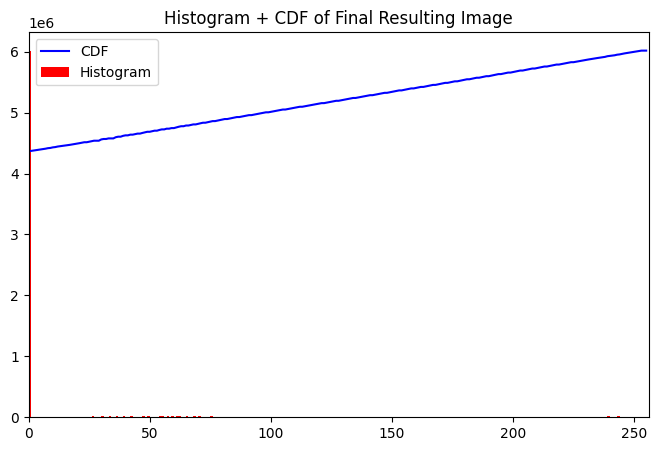

In [617]:
final_hist, bins = np.histogram(q5_foreground_eq.ravel(), bins=256, range=[0,256])
cdf_final = final_hist.cumsum()
cdf_final_normalized = cdf_final * final_hist.max() / cdf_final.max()  # scale for plotting

# Plot histogram + CDF
plt.figure(figsize=(8,5))
plt.plot(cdf_final_normalized, color='b')
plt.hist(q5_foreground_eq.flatten(), bins=256, range=[0,256], color='r')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc='upper left')
plt.title('Histogram + CDF of Final Resulting Image')
plt.show()



## Question 6 - Sobel Filtering

In [618]:
q6_img_path = base_path + "einstein.png";
q6_img = cv.imread(q6_img_path, cv.IMREAD_GRAYSCALE)
assert q6_img is not None

Text(0.5, 1.0, 'Original Image')

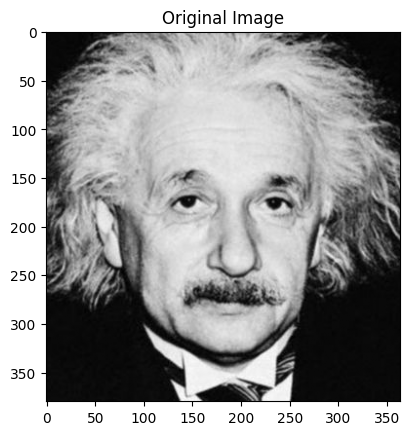

In [619]:
plt.imshow(q6_img, cmap="gray")
plt.title("Original Image")

In [620]:
#Sobel Filtering with Filter 2D
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.float32)
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
q6_im_x = cv.filter2D(q6_img, cv.CV_32F, sobel_x)
q6_im_y = cv.filter2D(q6_img, cv.CV_32F, sobel_y)

#normalize
q6_im_x_norm = (q6_im_x - q6_im_x.min()) / (q6_im_x.max() - q6_im_x.min())
q6_im_y_norm = (q6_im_y - q6_im_y.min()) / (q6_im_y.max() - q6_im_y.min())

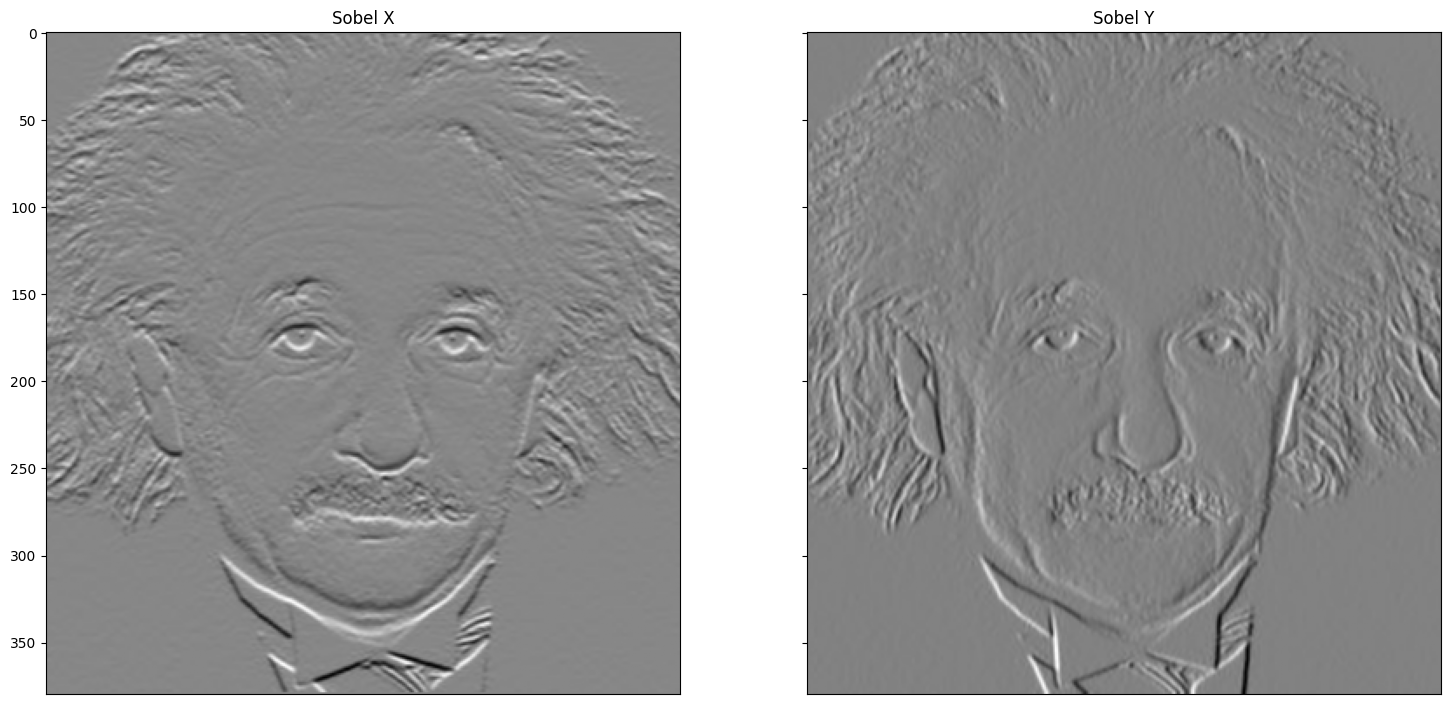

In [621]:
fig6, ax6 = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax6[0].imshow(q6_im_x_norm, cmap='gray')
ax6[0].set_title('Sobel X')
ax6[0].set_xticks([]), ax[0].set_yticks([])
ax6[1].imshow(q6_im_y_norm, cmap='gray')
ax6[1].set_title('Sobel Y')
ax6[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

In [622]:
#sobel filtering with open cv Sobel
q5_soble_img_x = cv.Sobel(q6_img, cv.CV_32F, 0, 1, ksize=3)
q5_soble_img_x_norm = cv.normalize(q5_soble_img_x, None, 0, 255, cv.NORM_MINMAX)
q5_soble_img_y = cv.Sobel(q6_img, cv.CV_32F, 1, 0, ksize=3)
q5_soble_img_y_norm= cv.normalize(q5_soble_img_y, None, 0, 255, cv.NORM_MINMAX)


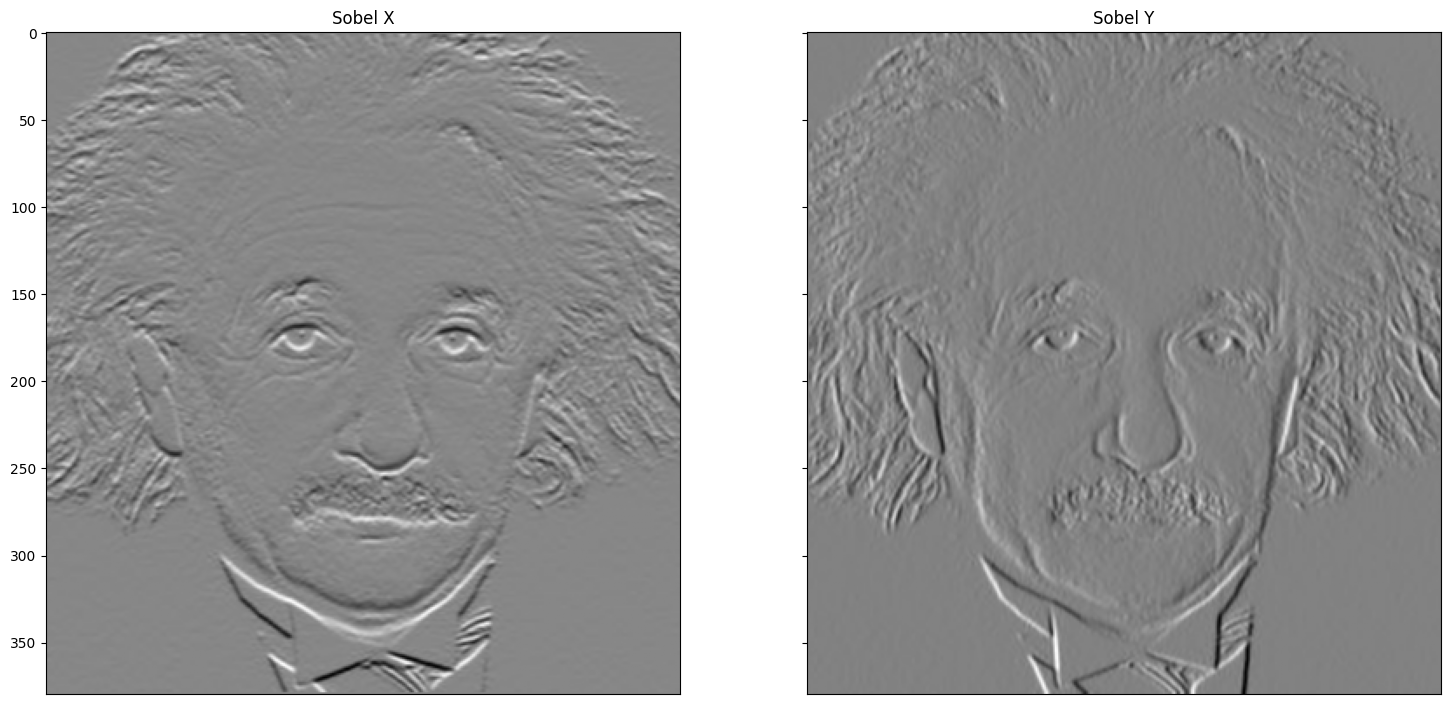

In [623]:
fig6, ax6 = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax6[0].imshow(q5_soble_img_x_norm, cmap='gray')
ax6[0].set_title('Sobel X')
ax6[0].set_xticks([]), ax[0].set_yticks([])
ax6[1].imshow(q5_soble_img_y_norm, cmap='gray')
ax6[1].set_title('Sobel Y')
ax6[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

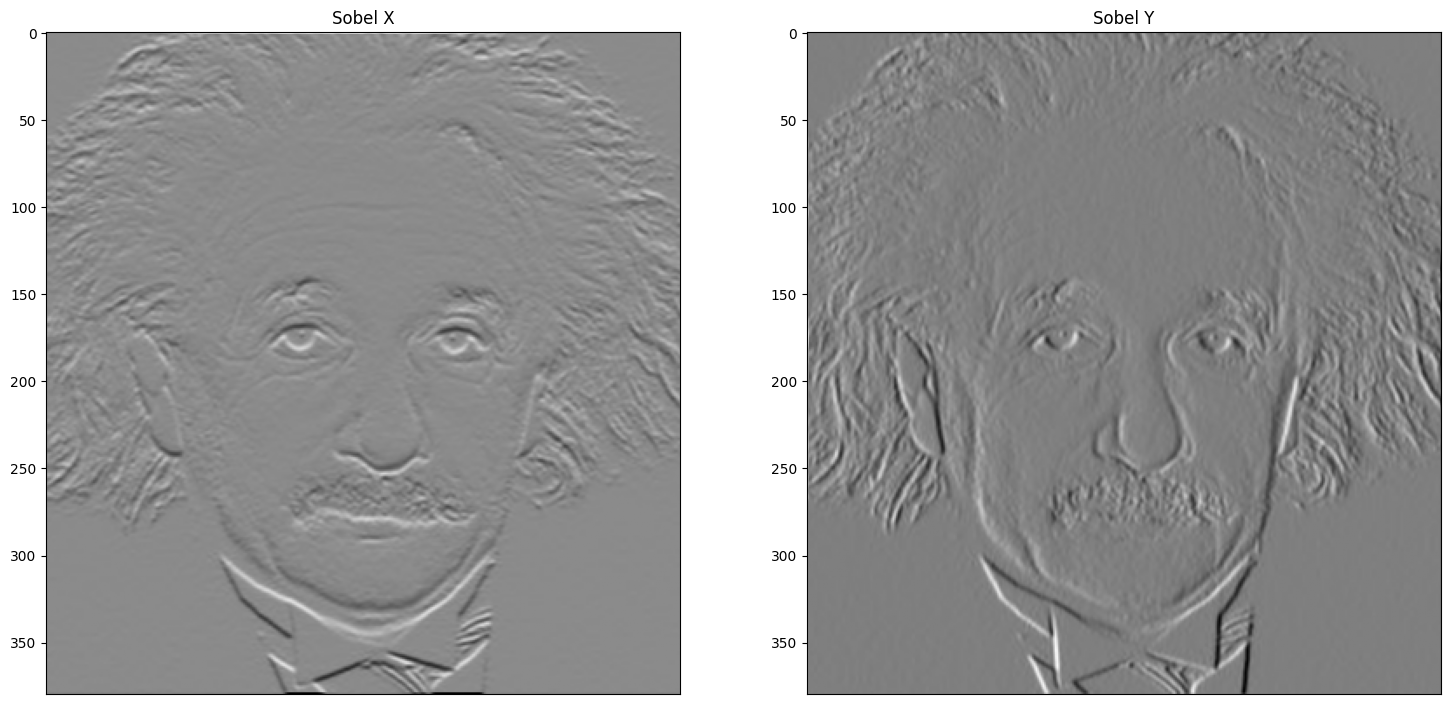

In [624]:
#own code
def apply_filter(img, kernel):
  rows ,cols = q6_img.shape
  pad = 1  # (kernal size - 1 / 2)
  kernal_height, kernel_width = kernel.shape

  output = np.zeros_like(img, dtype=np.float32)
  padding = np.pad(img, ((pad, pad), (pad, pad)), mode='constant')

  for i in range(rows):
    for j in range(cols):
      region = padding[i:i+kernal_height, j:j+kernel_width]
      output[i, j] = np.sum(region * kernel)

  return output


q5_soble_x_cus = apply_filter(q6_img, sobel_x)
q5_soble_y_cus = apply_filter(q6_img, sobel_y)
q5_soble_x_cus_norm = (q5_soble_x_cus - q5_soble_x_cus.min()) / (q5_soble_x_cus.max() - q5_soble_x_cus.min())
q5_soble_y_cus_norm = (q5_soble_y_cus - q5_soble_y_cus.min()) / (q5_soble_y_cus.max() - q5_soble_y_cus.min())

fig61, ax61 = plt.subplots(1,2,figsize=(18,9))
ax61[0].imshow(q5_soble_x_cus_norm, cmap='gray')
ax61[0].set_title('Sobel X')
ax61[0].set_xticks([]), ax[0].set_yticks([])
ax61[1].imshow(q5_soble_y_cus_norm, cmap='gray')
ax61[1].set_title('Sobel Y')
ax61[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


Text(0.5, 1.0, 'Sobel Y')

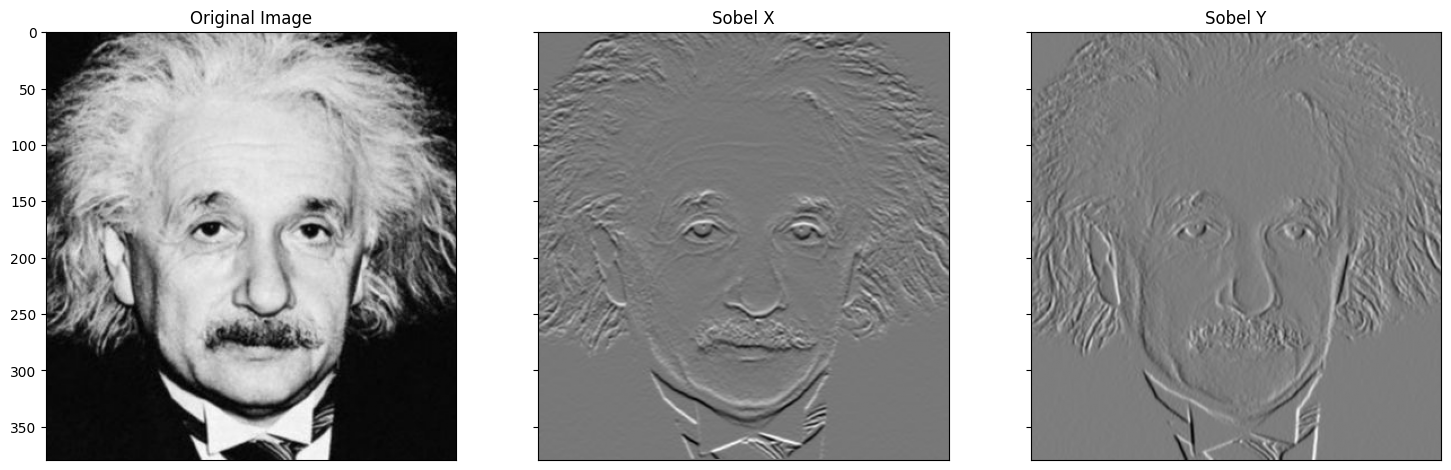

In [625]:
# sobel filtering using given functions
a = np.array([1, 2, 1]).astype(np.float32)
b = np.array([1, 0, -1]).astype(np.float32)
sobel_x_new = np.outer(b, a)
sobel_y_new = np.transpose(sobel_x_new)

q6_im_x_new = cv.filter2D(q6_img, cv.CV_32F, sobel_x_new)
q6_im_y_new = cv.filter2D(q6_img, cv.CV_32F, sobel_y_new)
q6_im_x_new_norm = (q6_im_x_new - q6_im_x_new.min()) / (q6_im_x_new.max() - q6_im_x_new.min())
q6_im_y_new_norm = (q6_im_y_new - q6_im_y_new.min()) / (q6_im_y_new.max() - q6_im_y_new.min())

fig62, ax62 = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
ax62[0].imshow(q6_img, cmap='gray')
ax62[0].set_title('Original Image')
ax62[0].set_xticks([]), ax[0].set_yticks([])
ax62[1].imshow(q6_im_x_new_norm, cmap='gray')
ax62[1].set_title('Sobel X')
ax62[1].set_xticks([]), ax[1].set_yticks([])
ax62[2].imshow(q6_im_y_new_norm, cmap='gray')
ax62[2].set_title('Sobel Y')

## Question 7 - Scaling

In [626]:
q7_im1_path = base_path + 'a1q8images/im01small.png'
q7_im2_path = base_path + 'a1q8images/im02small.png'
q7_im1_og_path = base_path +  'a1q8images/im01.png'
q7_im2_og_path = base_path +  'a1q8images/im02.png'

q7_im1 = cv.imread(q7_im1_path, cv.IMREAD_COLOR)
q7_im2 = cv.imread(q7_im2_path, cv.IMREAD_COLOR)
q7_im1_og = cv.imread(q7_im1_og_path, cv.IMREAD_COLOR)
q7_im2_og = cv.imread(q7_im2_og_path, cv.IMREAD_COLOR)
assert q7_im1 is not None

In [627]:
def zoom_image(img, scale_factor, method='nearest'):
    if method == 'nearest':
      return cv.resize(img, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_NEAREST)
    elif method == 'bilinear':
      return cv.resize(img, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv.INTER_LINEAR)

def normalized_ssd(img1, img2):
    """Compute normalized sum of squared differences"""
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    return np.sum(diff**2) / (img1.shape[0] * img1.shape[1])

In [628]:
zoomed_nearest_im1 = zoom_image(q7_im1, 4, method='nearest')
zoomed_bilinear_im1 = zoom_image(q7_im1, 4, method='bilinear')

print("Normalized SSD (Nearest-Neighbor):", normalized_ssd(zoomed_nearest_im1, q7_im1_og))
print("Normalized SSD (Bilinear):", normalized_ssd(zoomed_bilinear_im1, q7_im1_og))

Normalized SSD (Nearest-Neighbor): 408.80716
Normalized SSD (Bilinear): 345.27554


In [629]:
zoomed_nearest_im2 = zoom_image(q7_im2, 4, method='nearest')
zoomed_bilinear_im2 = zoom_image(q7_im2, 4, method='bilinear')

print("Normalized SSD (Nearest-Neighbor):", normalized_ssd(zoomed_nearest_im2, q7_im2_og))
print("Normalized SSD (Bilinear):", normalized_ssd(zoomed_bilinear_im2, q7_im2_og))

Normalized SSD (Nearest-Neighbor): 79.33822
Normalized SSD (Bilinear): 55.03773


#Question 8  

In [646]:
q8_img_path = base_path + "daisy.jpg"
q8_img = cv.imread(q8_img_path, cv.IMREAD_COLOR)
assert q8_img is not None

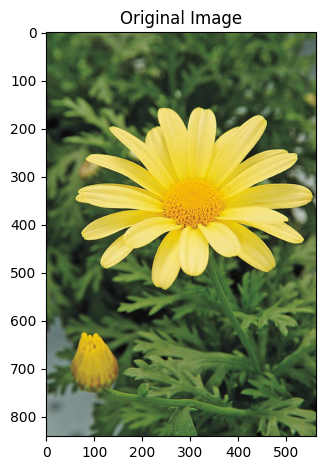

In [647]:
plt.imshow(cv.cvtColor(q8_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.tight_layout()
plt.show()

In [648]:
del mask, seg_mask, bgd_model, fgd_model, foreground, background


In [651]:
mask = np.zeros(q8_img.shape[:2], np.uint8)


In [652]:
mask[300:400, 500:520] = cv.GC_FGD
rect = (20, 20, q8_img.shape[1]-40, q8_img.shape[0]-40)  # x, y, width, height
bgd_model = np.zeros((1,65), np.float64)
fgd_model = np.zeros((1,65), np.float64)


In [653]:
cv.grabCut(q8_img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)
seg_mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
bgd_model = np.zeros((1,65), np.float64)
fgd_model = np.zeros((1,65), np.float64)
foreground = q8_img * seg_mask[:, :, np.newaxis]
background = q8_img * (1 - seg_mask[:, :, np.newaxis])

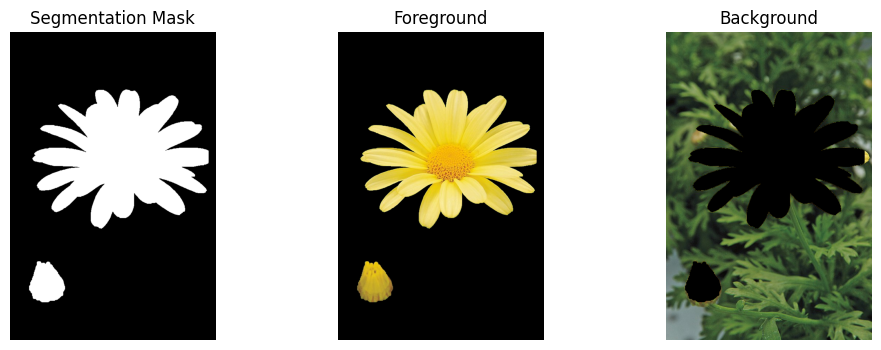

In [654]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(seg_mask, cmap='gray'); plt.title('Segmentation Mask'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)); plt.title('Foreground'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB)); plt.title('Background'); plt.axis('off')
plt.show()

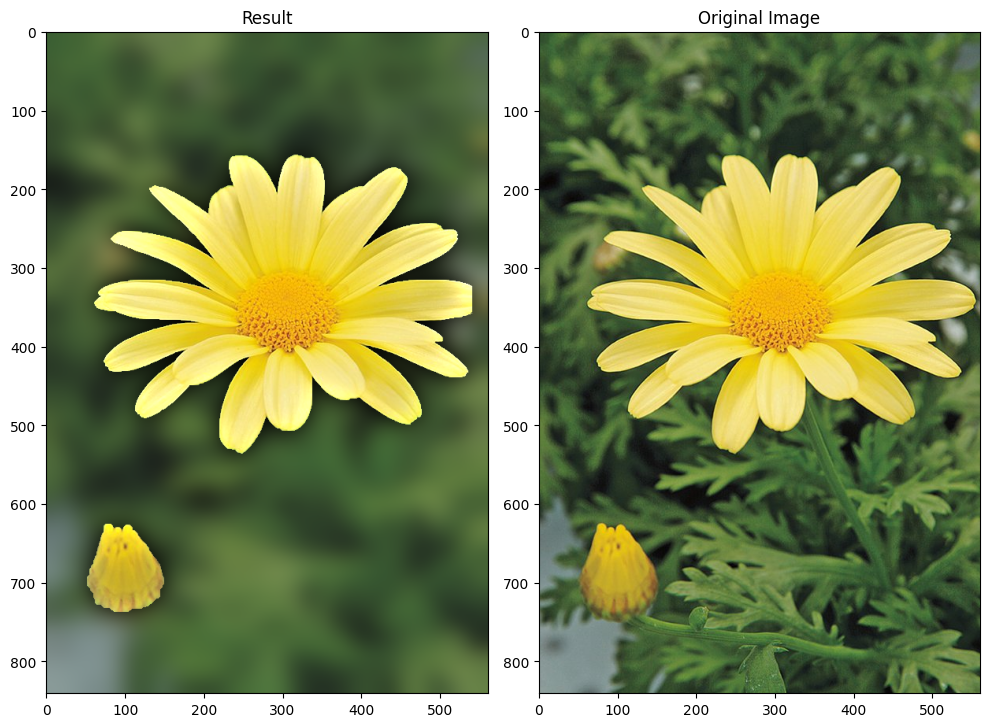

In [655]:
blurred = cv.GaussianBlur(background,(101,101),0)
q8_img_add = cv.add(foreground, blurred)
fig8, ax8 = plt.subplots(1,2, figsize=(10,10))
ax8[0].imshow(cv.cvtColor(q8_img_add, cv.COLOR_BGR2RGB))
ax8[0].set_title('Result')
ax8[1].imshow(cv.cvtColor(q8_img, cv.COLOR_BGR2RGB))
ax8[1].set_title('Original Image')
plt.tight_layout()
plt.show()

## question 9

In [658]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from scipy import stats

def noisy(noise_typ, image):
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Should be float32 and range [0, 255].
    noise_typ : str
        'gauss', 'poisson', 's&p', or 'speckle'
    """
    if image.ndim == 2:
        row, col = image.shape
        ch = 1
    else:
        row, col, ch = image.shape

    if noise_typ == "gauss":
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean, sigma, (row, col) if ch == 1 else (row, col, ch))
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy

    elif noise_typ == "s&p":
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)

        # Salt mode
        num_salt = np.ceil(amount * row * col * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt)) for i in (row, col)]
        if ch == 1:
            out[coords[0], coords[1]] = 255
        else:
            out[coords[0], coords[1], :] = 255

        # Pepper mode
        num_pepper = np.ceil(amount * row * col * (1. - s_vs_p))
        coords = [np.random.randint(0, i, int(num_pepper)) for i in (row, col)]
        if ch == 1:
            out[coords[0], coords[1]] = 0
        else:
            out[coords[0], coords[1], :] = 0

        return out

    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return np.clip(noisy, 0.0, 255.0)

    elif noise_typ == "speckle":
        gauss = np.random.randn(row, col) if ch == 1 else np.random.randn(row, col, ch)
        noisy = image + image * gauss
        return np.clip(noisy, 0.0, 255.0)

    else:
        raise ValueError(f"Unknown noise type: {noise_typ}")


In [659]:
q9_img_path = base_path + "rice.png"
q9_img = cv.imread(q9_img_path, cv.IMREAD_GRAYSCALE)
assert q9_img is not None
q9_copy = q9_img.copy()

DescribeResult(nobs=np.int64(65536), minmax=(np.float64(15.075196204901047), np.float64(233.3226098300507)), mean=np.float64(111.23539669890656), variance=np.float64(1904.8863859839414), skewness=np.float64(0.49053004302476627), kurtosis=np.float64(-0.567234860938505))


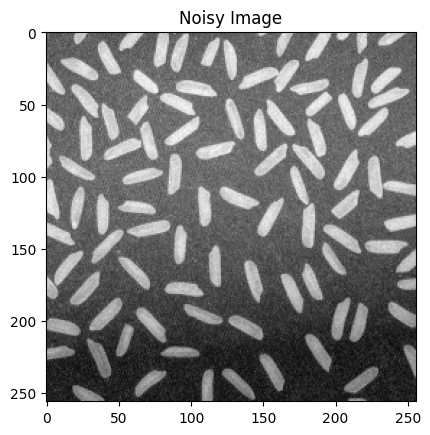

In [660]:
gaussian_corrupted = q9_img + noisy("gauss", q9_img)
spcorrpted = q9_img + noisy("s&p", q9_img)
plt.imshow(gaussian_corrupted, cmap="gray")
plt.title("Noisy Image")
plt.show()

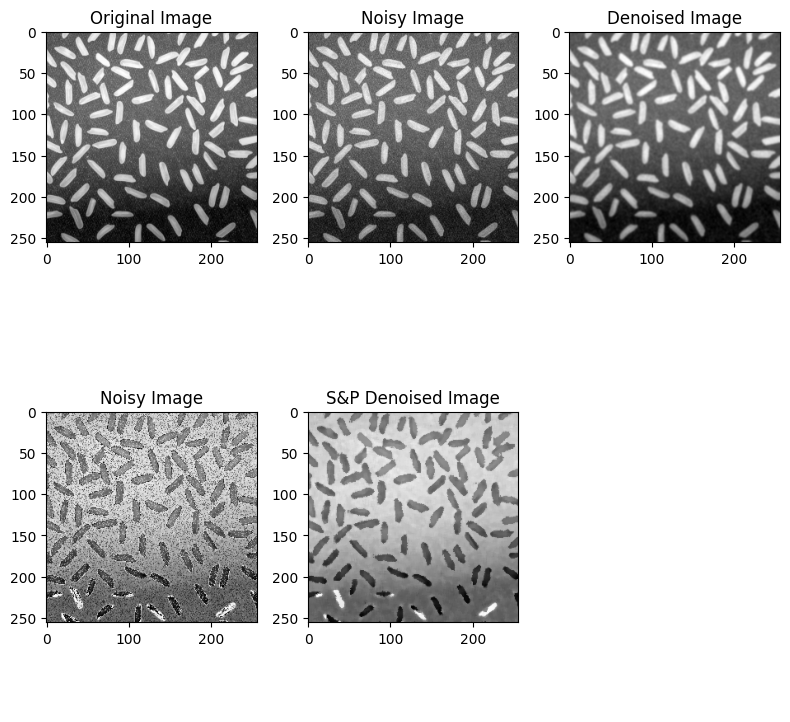

In [661]:
#apply gaussian blur
denoised = cv.GaussianBlur(gaussian_corrupted, (5,5), 1.0)
#apply med blur for slat and pepper
median = cv.medianBlur(spcorrpted, 5)

fig9, ax9 = plt.subplots(2,3, figsize=(8,8))
ax9[0,0].imshow(q9_img, cmap="gray")
ax9[0,0].set_title('Original Image')
ax9[0,1].imshow(gaussian_corrupted, cmap="gray")
ax9[0,1].set_title('Noisy Image')
ax9[0,2].imshow(denoised, cmap="gray")
ax9[0,2].set_title('Denoised Image')
ax9[1,0].imshow(spcorrpted, cmap="gray")
ax9[1,0].set_title('Noisy Image')
ax9[1,1].imshow(median, cmap="gray")
ax9[1,1].set_title('S&P Denoised Image')
ax9[1,2].axis('off')
plt.tight_layout()
plt.show()

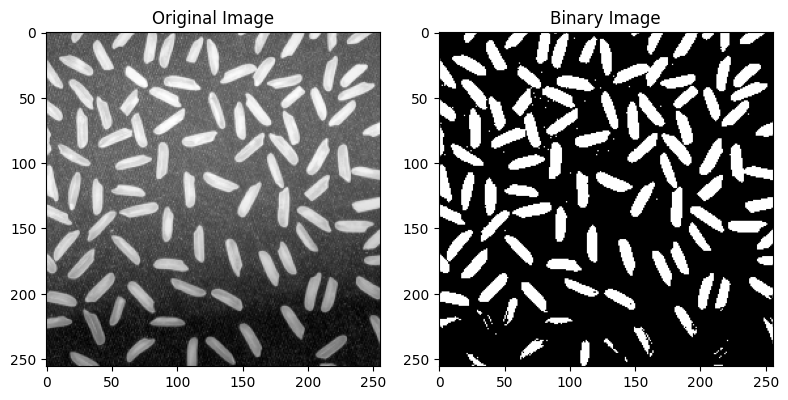

In [662]:
otsu_thresh, bin_seg_img = cv.threshold(q9_copy, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig91, ax91 = plt.subplots(1,2, figsize=(8,8))
ax91[0].imshow(q9_copy, cmap="gray")
ax91[0].set_title('Original Image')
ax91[1].imshow(bin_seg_img, cmap="gray")
ax91[1].set_title('Binary Image')
plt.tight_layout()
plt.show()

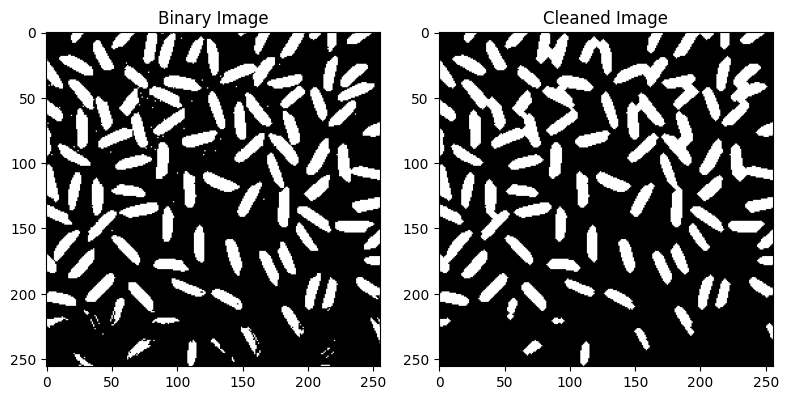

In [663]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
opening = cv.morphologyEx(bin_seg_img, cv.MORPH_OPEN, kernel, iterations=2)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations=2)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations=2)

min_area = 30
cleaned = np.zeros_like(closing)
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing, connectivity=8)

for i in range(1, num_labels):
    if stats[i, cv.CC_STAT_AREA] >= min_area:
        cleaned[labels == i] = 255

fig92, ax92 = plt.subplots(1,2, figsize=(8,8))
ax92[0].imshow(bin_seg_img, cmap="gray")
ax92[0].set_title('Binary Image')
ax92[1].imshow(cleaned, cmap="gray")
ax92[1].set_title('Cleaned Image')
plt.tight_layout()
plt.show()

In [664]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(cleaned, connectivity=8)
print("Number of grains:", num_labels - 1)


Number of grains: 76


## question 10

In [665]:
q10_img_path = base_path + "sapphire.jpg"
q10_img = cv.imread(q10_img_path, cv.IMREAD_COLOR)
q10_img_cp = q10_img.copy()
assert q10_img is not None

In [666]:
q10_img_cp.dtype

dtype('uint8')

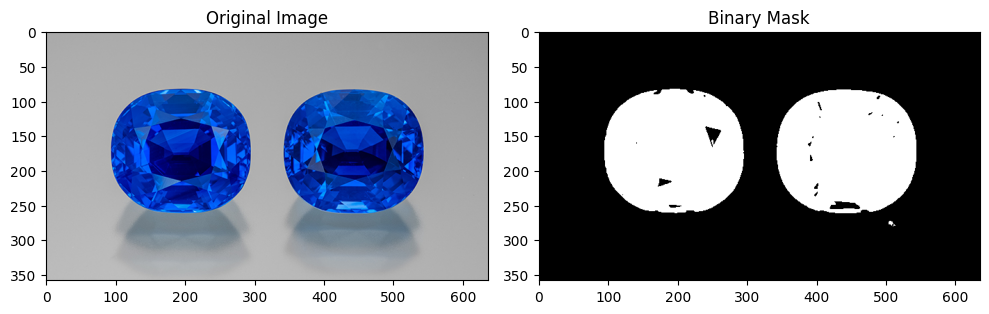

In [667]:
gray = cv.cvtColor(q10_img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
_, binary_mask = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary_mask = 255 - binary_mask

fig101, ax101 = plt.subplots(1,2, figsize=(10,10))
ax101[0].imshow(cv.cvtColor(q10_img, cv.COLOR_BGR2RGB))
ax101[0].set_title('Original Image')
ax101[1].imshow(binary_mask, cmap="gray")
ax101[1].set_title('Binary Mask')
plt.tight_layout()

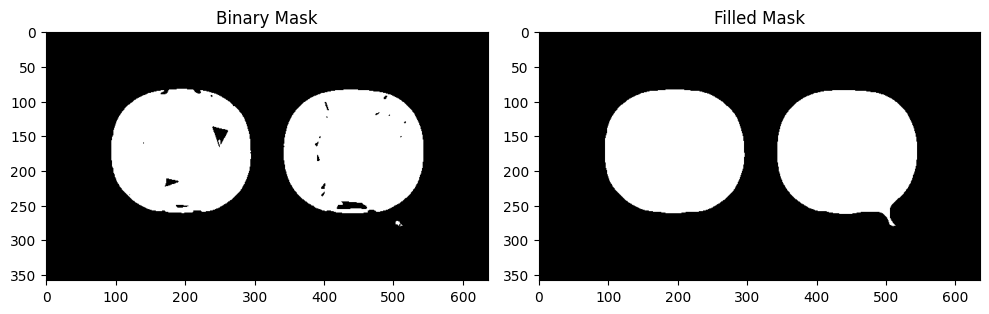

In [668]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (40,40))
mask_filled = cv.morphologyEx(binary_mask, cv.MORPH_CLOSE, kernel)

fig102, ax102 = plt.subplots(1,2, figsize=(10,10))
ax102[0].imshow(binary_mask, cmap="gray")
ax102[0].set_title('Binary Mask')
ax102[1].imshow(mask_filled, cmap="gray")
ax102[1].set_title('Filled Mask')
plt.tight_layout()


In [669]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_filled)
sapphire_areas_px = stats[1:, cv.CC_STAT_AREA]
print("Number of sapphires:", len(sapphire_areas_px))


Number of sapphires: 2


In [670]:
print(f'Areas :', sapphire_areas_px)

Areas : [29847 30239]


In [671]:
f = 8
z = 480
scale = f / z
actual_areas = sapphire_areas_px * (scale**2)
print("Sapphire 1 in sq mm:", actual_areas[0])
print("Sapphire 2 in sq mm:", actual_areas[1])


Sapphire 1 in sq mm: 8.290833333333333
Sapphire 2 in sq mm: 8.399722222222222
